In [ ]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, firwin, gaussian
import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, TimeDistributed, Reshape, Lambda
from tensorflow.keras.models import Model
from keras.optimizers import Adam
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
h5_file_name = 'steel_data.h5'
destination_path = '/content/drive/MyDrive/' + h5_file_name

with h5py.File(destination_path, 'r') as hf:
    X_train = hf['X_train'][:]
    X_test = hf['X_test'][:]
    y_train = hf['y_train'][:]
    y_test = hf['y_test'][:]
    X_test_1 = hf['X_test_1'][:]
    X_test_2 = hf['X_test_2'][:]
    X_test_3 = hf['X_test_3'][:]
    X_test_4 = hf['X_test_4'][:]
    X_test_5 = hf['X_test_5'][:]
    X_test_6 = hf['X_test_6'][:]
    X_test_7 = hf['X_test_7'][:]
    X_test_8 = hf['X_test_8'][:]
    X_test_9 = hf['X_test_9'][:]
    X_test_10 = hf['X_test_10'][:]
    y_test_1 = hf['y_test_1'][:]
    y_test_2 = hf['y_test_2'][:]
    y_test_3 = hf['y_test_3'][:]
    y_test_4 = hf['y_test_4'][:]
    y_test_6 = hf['y_test_6'][:]
    y_test_7 = hf['y_test_7'][:]
    y_test_5 = hf['y_test_5'][:]
    y_test_8 = hf['y_test_8'][:]
    y_test_9 = hf['y_test_9'][:]
    y_test_10 = hf['y_test_10'][:]
    X_test_lof_0_5 = hf['X_test_lof_0_5'][:]
    X_test_lof_1 = hf['X_test_lof_1'][:]
    X_test_lof_2 = hf['X_test_lof_2'][:]
    y_test_lof_0_5 = hf['y_test_lof_0_5'][:]
    y_test_lof_1 = hf['y_test_lof_1'][:]
    y_test_lof_2 = hf['y_test_lof_2'][:]

In [ ]:
def mean_std(data,axis = 0):
    mean = np.mean(data , axis = axis, keepdims = True)
    std = np.std(data, axis = axis, keepdims = True) + 1e-9
    # normalized_data = (data - mean) / st
    return mean, std

def standard_normalize(data,axis = 0):
    mean = np.mean(data , axis = axis, keepdims = True)
    std = np.std(data, axis = axis, keepdims = True) + 1e-9
    normalized_data = (data - mean) / std
    return normalized_data

checkpoint= ModelCheckpoint(
    "best_model_weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min",
    verbose=1
)

def get_callbacks(patience):
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=patience // 2,
        min_lr=1e-12,
        verbose=1
    )
    return [checkpoint, reduce_lr]

In [ ]:
X_train_norm = standard_normalize(X_train)
mean_train, std_train = mean_std(X_train)

In [ ]:
X_test_norm = (X_test - mean_train)/std_train

In [ ]:
input_shape = (500, 1)

input_layer = tf.keras.layers.Input(shape=input_shape)

x = tf.keras.layers.Conv1D(4, 3, 1, padding='same')(input_layer)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool1D()(x)

x = tf.keras.layers.Conv1D(8, 3, 1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool1D()(x)

x = tf.keras.layers.Conv1D(16, 3, 1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool1D()(x)

x = tf.keras.layers.Conv1D(32, 3, 1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool1D()(x)

x = tf.keras.layers.Conv1D(64, 3, 1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool1D()(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(8, 'relu')(x)
output = tf.keras.layers.Dense(2)(x)

model_cnn_1d = tf.keras.models.Model(inputs=input_layer, outputs=output)
model_cnn_1d.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 500, 4)            16        
                                                                 
 batch_normalization (Batch  (None, 500, 4)            16        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 500, 4)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 250, 4)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 250, 8)            104 

In [ ]:
optimizer = Adam(learning_rate=0.001)
model_cnn_1d.compile(loss='mean_squared_error', optimizer=optimizer)

callbacks = get_callbacks(20)

history = model_cnn_1d.fit(X_train_norm, y_train,
                      validation_split = 0.3,
                      epochs=300, batch_size= 128,
                      callbacks=[callbacks])

Epoch 1/300
106/106 [==============================] - ETA: 0s - loss: 2.4776
Epoch 1: val_loss did not improve from 4.35602
106/106 [==============================] - 13s 15ms/step - loss: 2.4776 - val_loss: 8.1214 - lr: 0.0010
Epoch 2/300
106/106 [==============================] - ETA: 0s - loss: 1.1093
Epoch 2: val_loss improved from 4.35602 to 3.32400, saving model to best_model_weights.h5
106/106 [==============================] - 1s 11ms/step - loss: 1.1093 - val_loss: 3.3240 - lr: 0.0010
Epoch 3/300
104/106 [============================>.] - ETA: 0s - loss: 0.9525
Epoch 3: val_loss improved from 3.32400 to 1.76216, saving model to best_model_weights.h5
106/106 [==============================] - 1s 10ms/step - loss: 0.9538 - val_loss: 1.7622 - lr: 0.0010
Epoch 4/300
103/106 [============================>.] - ETA: 0s - loss: 0.8605
Epoch 4: val_loss improved from 1.76216 to 0.96768, saving model to best_model_weights.h5
106/106 [==============================] - 1s 11ms/step - los

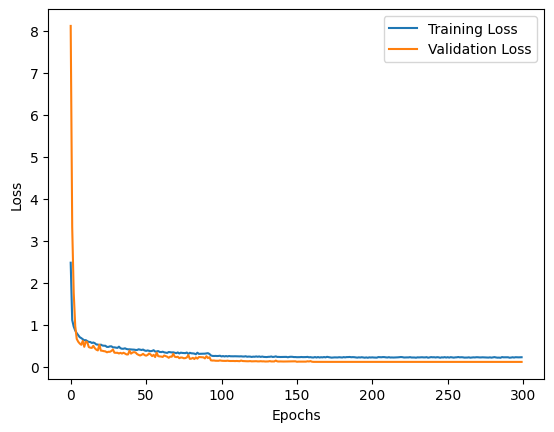

In [ ]:
plt.figure()
plt.plot(model_cnn_1d.history.history["loss"], label="Training Loss")
plt.plot(model_cnn_1d.history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
input_shape = (500, 1)

input_layer = tf.keras.layers.Input(shape=input_shape)
x = tf.keras.layers.LSTM(units=32, return_sequences=True)(input_layer)
x = tf.keras.layers.LSTM(units=16, return_sequences=True)(x)
x = tf.keras.layers.LSTM(units=32, return_sequences= True)(x)
x = tf.keras.layers.LSTM(units=16, return_sequences=True)(x)
x = tf.keras.layers.LSTM(units=8, return_sequences=True)(x)
x = tf.keras.layers.LSTM(units=4, return_sequences=False)(x)



output = tf.keras.layers.Dense(2)(x)

model_lstm = tf.keras.models.Model(inputs=input_layer, outputs=output)
model_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 lstm_6 (LSTM)               (None, 500, 32)           4352      
                                                                 
 lstm_7 (LSTM)               (None, 500, 16)           3136      
                                                                 
 lstm_8 (LSTM)               (None, 500, 32)           6272      
                                                                 
 lstm_9 (LSTM)               (None, 500, 16)           3136      
                                                                 
 lstm_10 (LSTM)              (None, 500, 8)            800       
                                                                 
 lstm_11 (LSTM)              (None, 4)                 208 

In [ ]:
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(loss='mean_squared_error', optimizer=optimizer)

callbacks = get_callbacks(20)

history = model_lstm.fit(X_train_norm, y_train,
                      validation_split = 0.3,
                      epochs=300, batch_size= 128,
                      callbacks=[callbacks])

Epoch 1/300
106/106 [==============================] - ETA: 0s - loss: 12.7334
Epoch 1: val_loss improved from inf to 9.06778, saving model to best_model_weights.h5
106/106 [==============================] - 27s 113ms/step - loss: 12.7334 - val_loss: 9.0678 - lr: 0.0010
Epoch 2/300
106/106 [==============================] - ETA: 0s - loss: 7.8478
Epoch 2: val_loss improved from 9.06778 to 7.07463, saving model to best_model_weights.h5
106/106 [==============================] - 10s 95ms/step - loss: 7.8478 - val_loss: 7.0746 - lr: 0.0010
Epoch 3/300
106/106 [==============================] - ETA: 0s - loss: 6.4515
Epoch 3: val_loss improved from 7.07463 to 6.04020, saving model to best_model_weights.h5
106/106 [==============================] - 9s 83ms/step - loss: 6.4515 - val_loss: 6.0402 - lr: 0.0010
Epoch 4/300
106/106 [==============================] - ETA: 0s - loss: 5.6183
Epoch 4: val_loss improved from 6.04020 to 5.37640, saving model to best_model_weights.h5
106/106 [=========

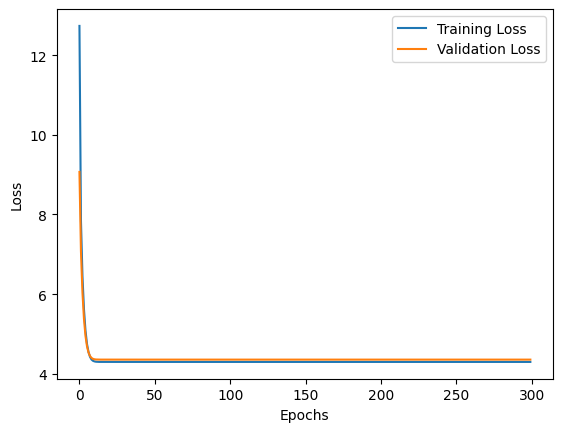

In [ ]:
plt.figure()
plt.plot(model_lstm.history.history["loss"], label="Training Loss")
plt.plot(model_lstm.history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()